# Bibliotecas a importar

In [2]:
import pandas as pd
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos el Data Set 

In [3]:
# Importamos el Data Set de Water Quality desde water_potability.csv y mostramos su información
df = pd.read_csv('water_potability.csv')
# Podemos notar que el data set cuenta con 3276 entradas y que hay valores nulos
df.info()
# Eliminamos las entradas que contengan valores nulos para mejorar la precisión de predicción
df.dropna(inplace = True)
# Podemos notar que el data set ahora cuenta con 2011 entradas y no tiene nulos
print('\n')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   floa

# Reporte de datos

In [4]:
# Utilizamos pandas_profiling para mostrar un reporte de datos del Data Set y su relación 
pp.ProfileReport(df, title = "Water Potability")

Render HTML: 100%|██████████| 1/1 [00:06<00:00,  6.75s/it]


# Obtenemos los datos de entrada y el label

In [5]:
# Separamos los datos en datos de entrada X y labels Y
X = df.drop(columns = 'Potability', axis = 1)
Y = df['Potability']

# Separamos la data en data de entrenamiento y data de pruebas en un ratio de 20/80, el ratio estándar 
train_data, test_data, train_labels, test_labels = train_test_split(X, Y , test_size = 0.25)


# Transformamos la data y la escalamos

In [6]:
transformar = StandardScaler()
train_data = transformar.fit_transform(train_data)
test_data = transformar.transform(test_data)

# Evaluamos los resultados de MLP con diferentes funciones de activacion

identity 1 : 0.44731610337972166
logistic 1 : 0.6222664015904572
tanh 1 : 0.4671968190854871
relu 1 : 0.6978131212723658
-------------------------------------------------
identity 2 : 0.415506958250497
logistic 2 : 0.6222664015904572
tanh 2 : 0.37773359840954274
relu 2 : 0.6242544731610338
-------------------------------------------------
identity 3 : 0.4532803180914513
logistic 3 : 0.6222664015904572
tanh 3 : 0.4274353876739563
relu 3 : 0.6978131212723658
-------------------------------------------------
identity 4 : 0.5447316103379721
logistic 4 : 0.614314115308151
tanh 4 : 0.5208747514910537
relu 4 : 0.68389662027833
-------------------------------------------------
       Funcion de Activacion  Precision
0                  Identidad   0.465209
1                   Sigmoide   0.465209
2       Tangente Hiperbólica   0.448310
3  Unidad Lineal Rectificada   0.675944


<AxesSubplot:xlabel='Precision', ylabel='Funcion de Activacion'>

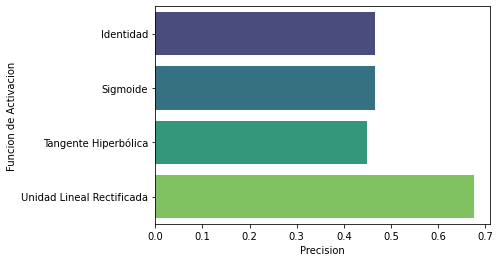

In [232]:
# Inicializamos el MLP con 2 capas ocultas para hallar mejor las regiones al clasificar
# Luego de varias pruebas determinamos el número de neuronas ocultas por capa en 7-5
multicapa = MLPClassifier(hidden_layer_sizes=(7,5) , max_iter=1000)

# Sumatorias de los resultados de precisión que tendrá cada función de activación para promediar
identity_precisiones = 0
logistic_precisiones = 0
tanh_precisiones = 0
relu_precisiones = 0
iteraciones = 0


for i in range(4):  
    # Ingresamos los datos de prueba al model
    multicapa.fit(train_data,train_labels)
    # Cambiamos las funciones de activación del modelo para comparar
    multicapa.activation = 'identity'
    prediccion = multicapa.predict(test_data)
    # Almacenamos las precisiones de cada iteración para comparar
    identity_precision = accuracy_score(test_labels,prediccion)
    print(multicapa.activation,  i + 1,":" , identity_precision)
    
    # Se repite lo recien comentado en próximas funciones de activación
    multicapa.activation = 'logistic'
    prediccion = multicapa.predict(test_data)
    logistic_precision = accuracy_score(test_labels,prediccion)
    print(multicapa.activation,  i + 1,":" , logistic_precision)

    multicapa.activation = 'tanh'
    prediccion = multicapa.predict(test_data)
    tanh_precision = accuracy_score(test_labels,prediccion)
    print(multicapa.activation,  i + 1,":" , tanh_precision)

    multicapa.activation = 'relu'
    prediccion = multicapa.predict(test_data)
    relu_precision = accuracy_score(test_labels,prediccion)
    print(multicapa.activation,  i + 1,":" , relu_precision)

    print('-------------------------------------------------')

    # Almacenamos la suma de las preciciones para luego promediar
    identity_precisiones += identity_precision
    logistic_precisiones += identity_precision
    tanh_precisiones += tanh_precision
    relu_precisiones += relu_precision
    iteraciones += 1

# Promediamos precisiones
identity_precisiones /= iteraciones
logistic_precisiones /= iteraciones
tanh_precisiones /= iteraciones
relu_precisiones /= iteraciones

# Creamos un nuevo dataframe de pandas para ordenar los resultados del mejor al peor
modelos = pd.DataFrame({
    'Funcion de Activacion': ['Identidad', 'Sigmoide', 'Tangente Hiperbólica', 'Unidad Lineal Rectificada'],
    'Precision': [identity_precisiones, logistic_precisiones, tanh_precisiones, relu_precisiones]})
print(modelos)
sns.barplot(x = modelos['Precision'], y = modelos['Funcion de Activacion'], palette='viridis')




# Modelo MLP con función de activación de Unidad Lineal Rectificada (ReLU) muestra mejores resultados para nuestro data set y será elegido para futuras comparaciones.

# Comparación con otros algoritmos conocidos de aprendizaje supervisado 
## KNN
### De igual manera que con MLP, elegimos el knn con la cantidad de vecinos más óptima para nuestro data set

La mejor cantidad de k-vecinos cercanos es de: 25


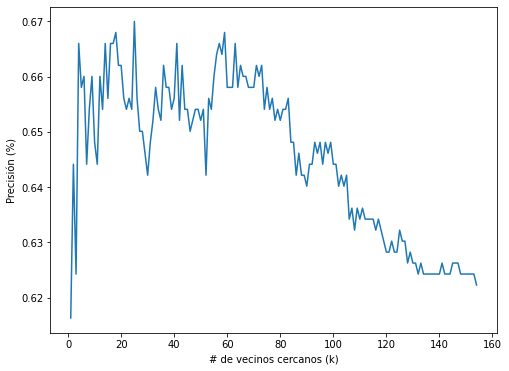

In [7]:
knn = KNeighborsClassifier(p = 2)
precisiones = []
max_precision = 0
max_k = 0
knn.fit(train_data,train_labels)

for k in range(1,155):
    knn.n_neighbors = k
    prediccion = knn.predict(test_data)
    precision = accuracy_score(test_labels, prediccion)
    precisiones.append(precision)
    if max_precision < precision:
        max_precision = precision
        max_k = k

# Plot the results 
print('La mejor cantidad de k-vecinos cercanos es de:', max_k)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,155), precisiones)
ax.set_xlabel('# de vecinos cercanos (k)')
ax.set_ylabel('Precisión (%)');




## Comparaciones
### Aplicamos los resultados obtenidos

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(7,5) ,max_iter=1000)
knn = KNeighborsClassifier(n_neighbors = max_k, p = 2)
bayes = GaussianNB()
svm = LinearSVC(max_iter= 2021)

max_mlp = 0
min_mlp = 1
for i in range(4):  

    mlp.fit(train_data,train_labels)
    mlp.activation = 'relu'
    prediccion = mlp.predict(test_data)
    mlp_precision = accuracy_score(test_labels, prediccion)
    print('MLP',  i + 1,':' , mlp_precision)
    if max_mlp < mlp_precision:
        max_mlp = mlp_precision
    if min_mlp > mlp_precision:
        min_mlp = mlp_precision
    print('----------------------------')

print('Mejor precisión hallada:', max_mlp)
print('Menor precisión hallada:', min_mlp)
print('\nMLP Mejor precisión',max_mlp)

knn.fit(train_data,train_labels)
prediccion = knn.predict(test_data)
knn_precision = accuracy_score(test_labels, prediccion)
print('KNN',knn_precision)

bayes.fit(train_data,train_labels)
prediccion = bayes.predict(test_data)
bayes_precision = accuracy_score(test_labels, prediccion)
print('Bayes' ,bayes_precision)

svm.fit(train_data, train_labels)
prediccion = svm.predict(test_data)
svm_precision = accuracy_score(test_labels, prediccion)
print('SVM',svm_precision)

MLP 1 : 0.6481113320079522
----------------------------
MLP 2 : 0.6739562624254473
----------------------------
MLP 3 : 0.658051689860835
----------------------------
MLP 4 : 0.6242544731610338
----------------------------
Mejor precisión hallada: 0.6739562624254473
Menor precisión hallada: 0.6242544731610338

MLP Mejor precisión 0.6739562624254473
KNN 0.6699801192842942
Bayes 0.6202783300198808
SVM 0.6163021868787276


## Comparacion en grafico de barras
### Mejor resultado de MLP

  Algoritmo/Modelo  Precision
0         MLP-ReLU   0.673956
1            KNN25   0.669980
2      Naive Bayes   0.620278
3              SVM   0.616302


<AxesSubplot:xlabel='Algoritmo/Modelo', ylabel='Precision'>

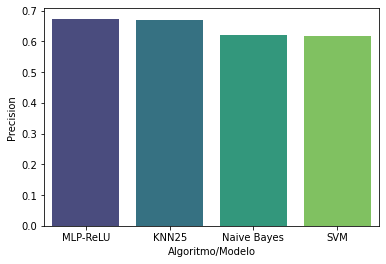

In [10]:
modelos = pd.DataFrame({
    'Algoritmo/Modelo': ['MLP-ReLU', 'KNN-k:'+ str(max_k), 'Naive Bayes', 'SVM'],
    'Precision': [max_mlp, knn_precision, bayes_precision, svm_precision]})
print(modelos)
sns.barplot(x = modelos['Algoritmo/Modelo'], y = modelos['Precision'], palette='viridis')

### Menor resultado de MLP

  Algoritmo/Modelo  Precision
0         MLP-ReLU   0.624254
1         KNN-k:35   0.669980
2      Naive Bayes   0.620278
3              SVM   0.616302


<AxesSubplot:xlabel='Algoritmo/Modelo', ylabel='Precision'>

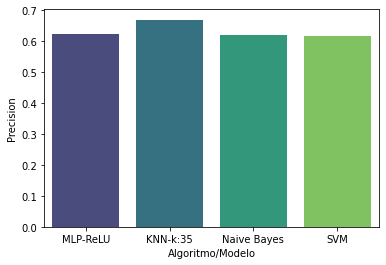

In [11]:
modelos = pd.DataFrame({
    'Algoritmo/Modelo': ['MLP-ReLU', 'KNN-k:'+ str(max_k), 'Naive Bayes', 'SVM'],
    'Precision': [min_mlp, knn_precision, bayes_precision, svm_precision]})
print(modelos)
sns.barplot(x = modelos['Algoritmo/Modelo'], y = modelos['Precision'], palette='viridis')

# Conclusión
### Luego de realizar las comparaciones respectivas de los modelos, MLP con su función de activación más óptima y K-NN con su k-vecinos más cercanos más óptimo, se concluyó que el modelo MLP con función de activación de unidad lineal rectificada es la que presenta un mayor porcentaje de precisión en la mayoría de los casos.